<a href="https://colab.research.google.com/github/Praveenyeduresi/Projects/blob/main/fake_real_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project title : Fake News Detection using Machine Learning & Deep Learning techniques.**

**Objective** : The main aim of this project is to identify the news articles whether it is fake or true news based on text. By predicting the fake news misinformation can be reduced.

In [87]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay, confusion_matrix


import tensorflow
#from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout


# Ignore FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/FakeRealNews')

**Data Loading**

In [4]:
#Data Loading
fake=pd.read_csv("Fake.csv")
true=pd.read_csv("True.csv")


In [5]:
#By adding 'target' column we are dividing fake & true news
fake['Target']=0
true['Target']=1
df=pd.concat([fake,true])
df

,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
11412,Bus drives into pedestrian underpass in Moscow...,MOSCOW (Reuters) - A passenger bus swerved off...,worldnews,"December 25, 2017",1
11413,"Pakistan allows wife, mother to visit Indian m...",ISLAMABAD (Reuters) - Pakistan allowed the wif...,worldnews,"December 25, 2017",1
11414,Iran confirms upholding death sentence for aca...,DUBAI (Reuters) - Iran s Supreme Court has uph...,worldnews,"December 25, 2017",1
11415,"Pope, on Christmas Eve, says faith demands res...",VATICAN CITY (Reuters) - Pope Francis strongly...,worldnews,"December 24, 2017",1


**Data Exploration**

In [10]:
#Data Exploration
#In this stage, i observed the challenges like having special characters, to remove stopwords,
# Tokenisation, lemmatization, converting text to lower case, Vectorization, duplicate data & missing values founded, type casting required for date column
print(df.columns)
df.dtypes
#df.describe(include='all')

Index(['title', 'text', 'subject', 'date', 'Target'], dtype='object')


,0
title,object
text,object
subject,object
date,object
Target,int64


In [ ]:
df.isnull().sum()

,0
title,3
text,3
subject,6
date,6
Target,0


In [ ]:
print(df.duplicated().sum())


67


**Data Preprocessing**

In [11]:
#removing duplicates
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [12]:
#handling missing values
# Fill missing values in title, text, and subject
df['title'].fillna('Unknown', inplace=True)
df['text'].fillna('Unknown', inplace=True)
df['subject'].fillna('Unknown', inplace=True)

<ipython-input-12-50e834e68368>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'].fillna('Unknown', inplace=True)
<ipython-input-12-50e834e68368>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'].fillna('Unknown', inplace=True)
<ipython-input-12-50e834e68368>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subject'].fillna('Unknown', inplace=True)


,0
title,0
text,0
subject,0
date,4
Target,0


In [13]:
#checking for missing data for variable 'date'
# Filter rows where the 'date' column has missing values
missing_date_rows = df[df['date'].isnull()]

# Display rows with dates missing
print(missing_date_rows)

                                                   title  \
9731   ANTI-AMERICAN GEORGE SOROS Locks Arms With NFL...   
9732                                             Unknown   
12408  WOW! AMERICA IS UNDER ATTACK By These 187 Orga...   
13364  A MUST READ! Here’s Why Voting For DONALD TRUM...   

                                                    text  subject date  Target  
9731   We just discovered another reason NOT to suppo...  Unknown  NaN       0  
9732                                             Unknown  Unknown  NaN       0  
12408  There have been many articles written about Ge...  Unknown  NaN       0  
13364  This is a must read for anyone who s undecided...  Unknown  NaN       0  


In [15]:
#to handle missing data for 'date' variable either replace with near date or drop or mean \ median imputation tech.

# Drop rows with missing target or date values
df.dropna(subset=['Target', 'date'], inplace=True)
df.isnull().sum()

<ipython-input-15-e76dbaa9f450>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Target', 'date'], inplace=True)


,0
title,0
text,0
subject,0
date,0
Target,0


In [ ]:
#imputation
# Filling missing dates with the mean date
# df['date'] = pd.to_datetime(df['date'], errors='coerce') # converting to date format

# mean_date = df['date'].mean()
# print(f"The mean date is: {mean_date}") #checking mean date

# df['date'].fillna(mean_date, inplace=True)



The mean date is: 2016-10-15 04:09:43.783783680


<ipython-input-44-0c0c2014ef91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce') # converting to date format
<ipython-input-44-0c0c2014ef91>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'].fillna(mean_date, inplace=True)


In [17]:
#This is for text preprocessing such as text normalization, tokenization, stemming\lemmatization, to remove stop words, special characters, links, numbers etc.,
#stemming
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import regexp_tokenize
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [18]:
# Define the preprocessing function
def wp(text):
    # Lowercase conversion
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Reconstruct text from tokens
    stem_cleaned_text = ' '.join(tokens)
    return stem_cleaned_text

In [19]:
df['stem_cleaned_text'] = df['text'].apply(wp)

<ipython-input-19-50f9520a11b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stem_cleaned_text'] = df['text'].apply(wp)


In [20]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import regexp_tokenize

# Download necessary NLTK resources
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Function to map POS tags to WordNet POS
def get_wordnet_pos(word):
    """Map POS tag to WordNet POS for better lemmatization."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN if no mapping available

# Preprocessing function with lemmatization
def wp1(text):
    # Lowercase conversion
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]

    # Reconstruct text from tokens
    lemma_cleaned_text1 = ' '.join(tokens)
    return lemma_cleaned_text1




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [21]:
# Apply the function to the dataframe
df['lemma_cleaned_text1'] = df['text'].apply(wp1)

<ipython-input-21-b04f62cd863d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemma_cleaned_text1'] = df['text'].apply(wp1)


In [22]:
df.head() # understanding difference b/w stemming and lemmatization for cleaned data

,title,text,subject,date,Target,stem_cleaned_text,lemma_cleaned_text1
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump wish american happi new year leav...,donald trump wish american happy new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,hous intellig committe chairman devin nune go ...,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,friday reveal former milwauke sheriff david cl...,friday reveal former milwaukee sheriff david c...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,christma day donald trump announc would back w...,christmas day donald trump announce would back...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope franci use annual christma day messag reb...,pope francis use annual christmas day message ...


**Exploratory Data Analysis**

Target
0    13497
1    11354
Name: count, dtype: int64


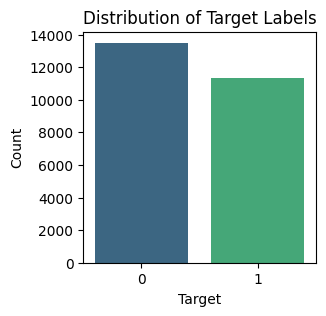

In [88]:
#Univariant analysis
#1 Target variable
Target_distribution = df['Target'].value_counts()
print(Target_distribution)

# Plot the Target variable distribution
plt.figure(figsize=(3, 3))
sns.barplot(x=Target_distribution.index, y=Target_distribution.values, palette='viridis')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Labels')
plt.show()

Target
0    13497
1    11354
Name: count, dtype: int64


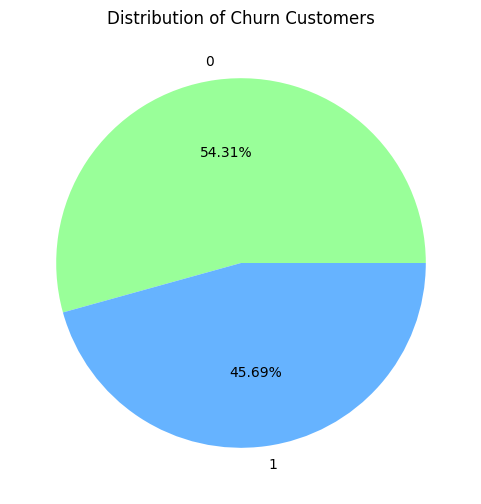

In [92]:
# Data distributions
#exploring target variable
plt.figure(figsize=(6, 6))
churn_counts = df['Target'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.2f%%', colors=['#99ff99', '#66b3ff'])
plt.title('Distribution of Churn Customers')
print(df['Target'].value_counts())
plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')
plt.show()


<ipython-input-24-6f8a4542fdcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['lemma_cleaned_text1'].apply(len)


Text Length Statistics:
count    24851.000000
mean      1634.527102
std       1072.585757
min          0.000000
25%       1016.000000
50%       1510.000000
75%       2037.000000
max      19396.000000
Name: text_length, dtype: float64


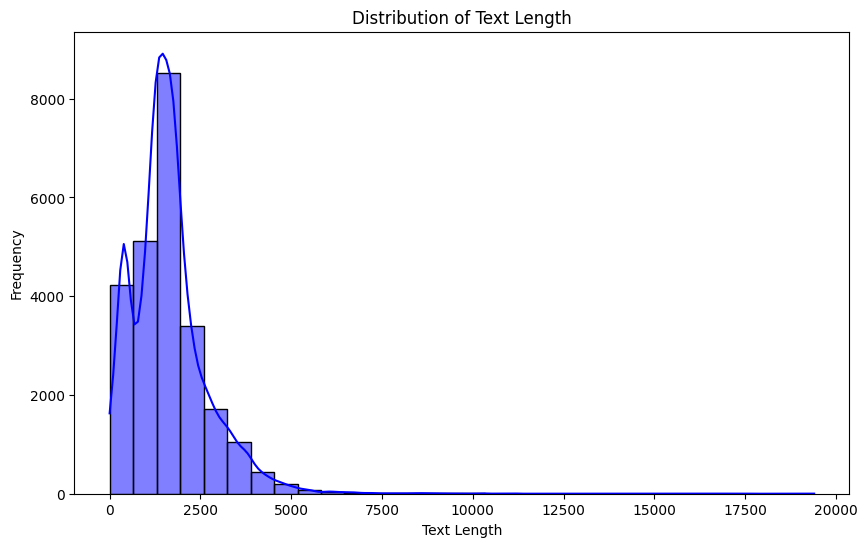

In [24]:
# 2. Text Length Distribution

df['text_length'] = df['lemma_cleaned_text1'].apply(len)

# Print basic statistics about text length
print("Text Length Statistics:")
print(df['text_length'].describe())

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='blue')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

#The distribution of text lengths is right-skewed, with most articles being concise (around 1500 characters)

<ipython-input-28-7f8c6e357dc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['lemma_cleaned_text1'].apply(lambda x: len(x.split()))


Word Count Statistics:
count    24851.000000
mean       233.269607
std        152.274891
min          0.000000
25%        147.000000
50%        217.000000
75%        291.000000
max       3904.000000
Name: word_count, dtype: float64


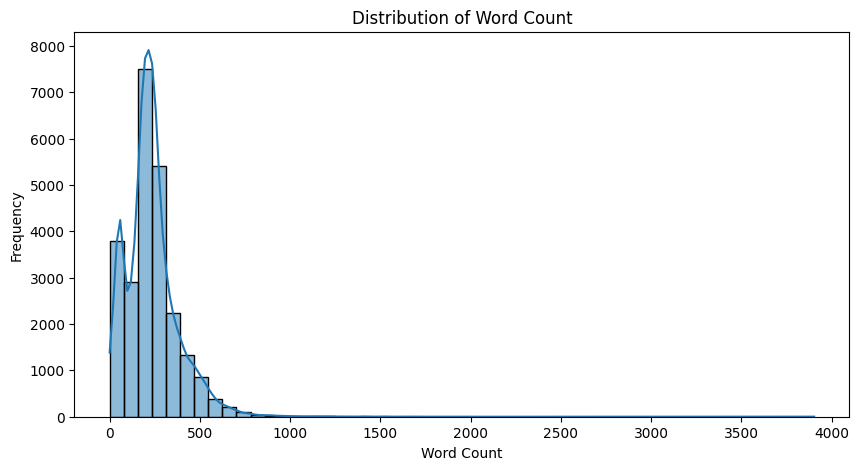

In [28]:
#3.word count distribution
df['word_count'] = df['lemma_cleaned_text1'].apply(lambda x: len(x.split()))

print("Word Count Statistics:")
print(df['word_count'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


subject
politicsNews                                                                                                             11220
News                                                                                                                      9050
politics                                                                                                                  4444
worldnews                                                                                                                  134
 of which Soros is a major financier.Mercy Corps: Vis a vis the Arab-Israeli conflict                                        1
 high taxes                                                                                                                  1
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"        1
Name: count, dtype: int64


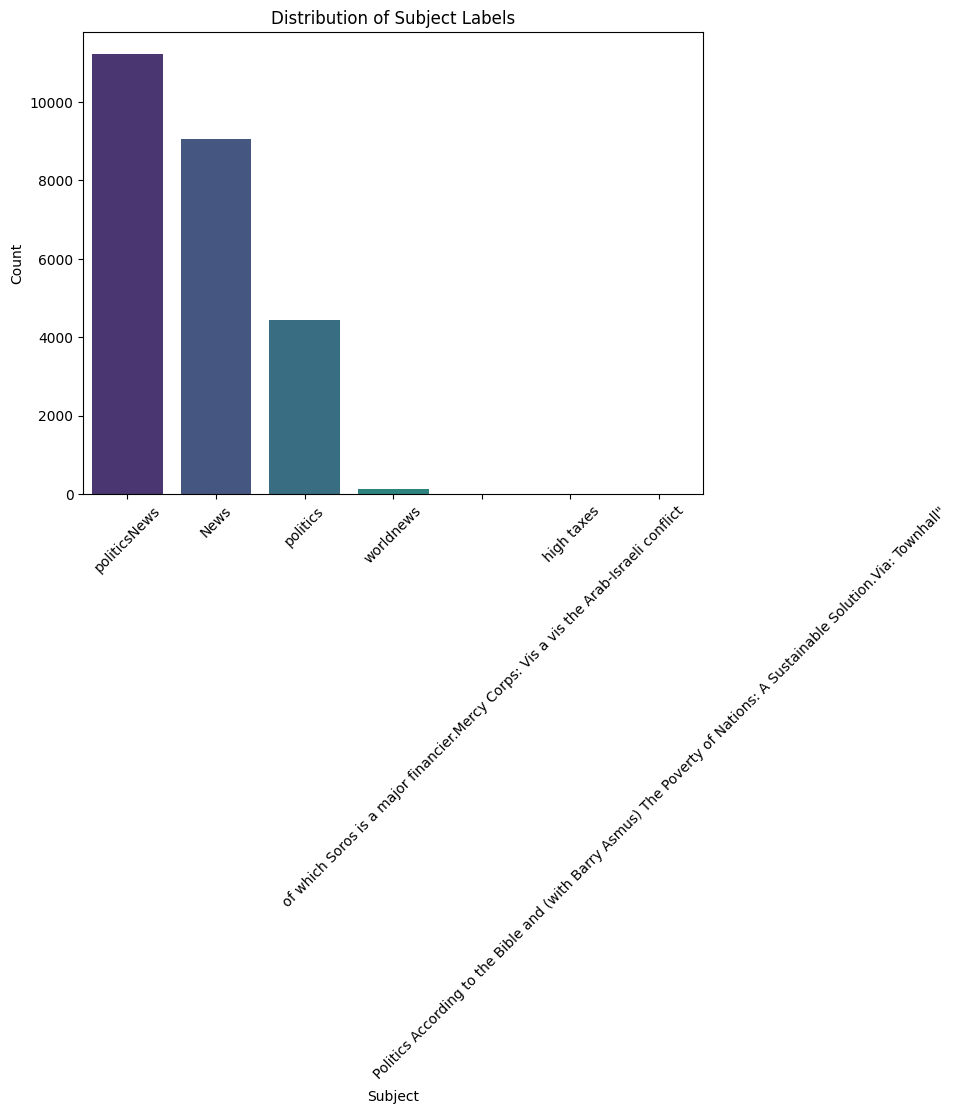

In [32]:
#Subject variable
Subject_distribution = df['subject'].value_counts()
print(Subject_distribution)

# Plot the Target variable distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=Subject_distribution.index, y=Subject_distribution.values, palette='viridis')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Distribution of Subject Labels')
plt.xticks(rotation=45)
plt.show()



**Observations in univariant analysis** - Data contains 54% of churn customers and 46% of retained customers which implies target variable distribution is balanced. Text length and word count have a right-skewed distribution, with most articles averaging around 1500 characters and around 250 words respectively. The subject distribution shows a high concentration in the "politics" category.

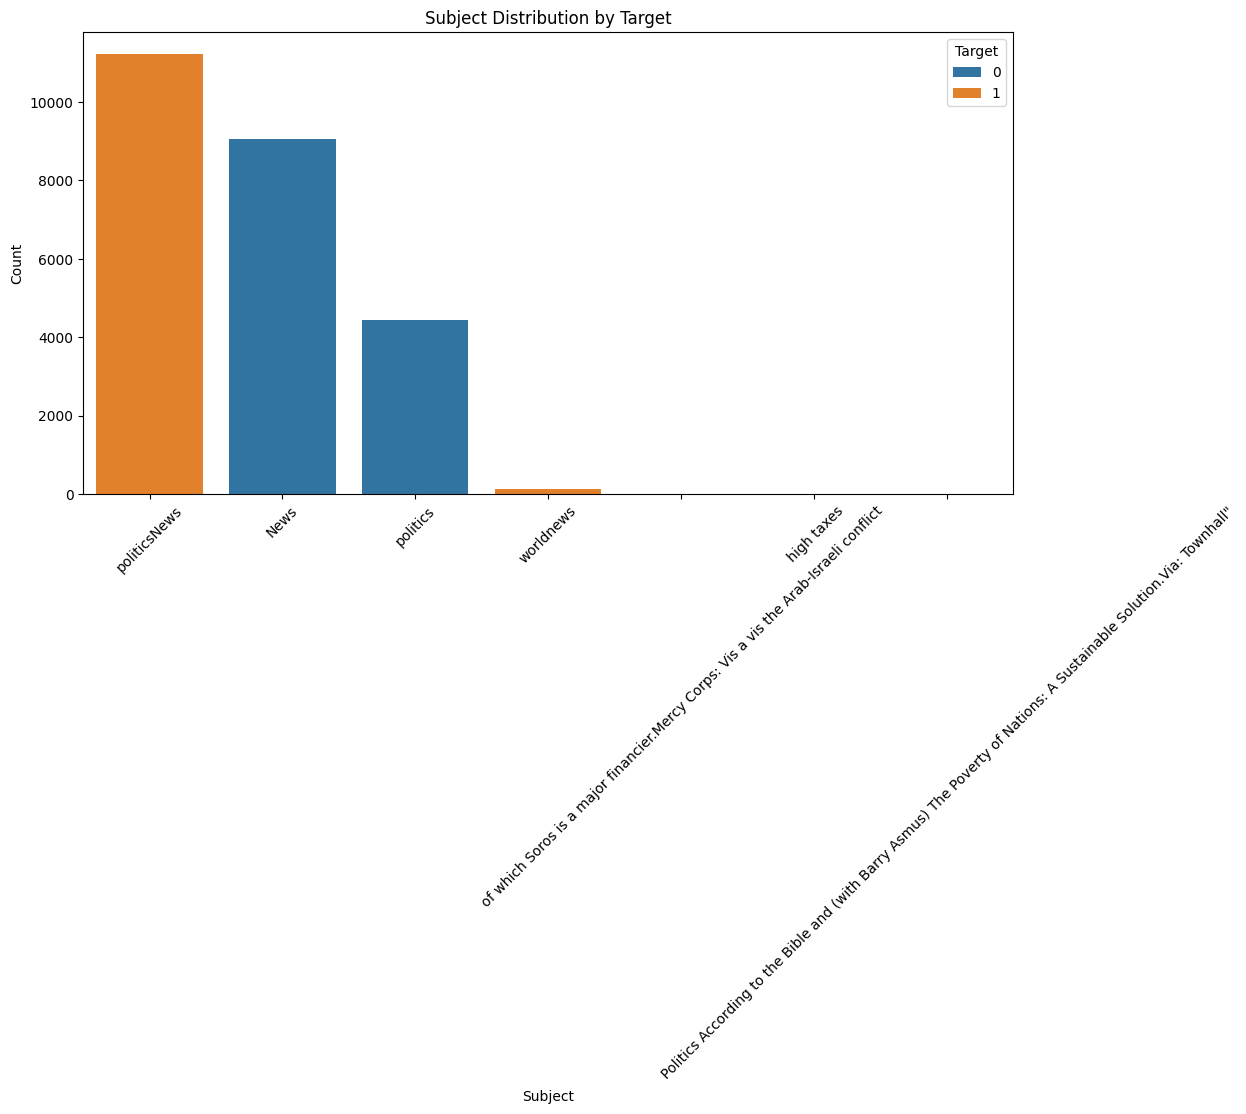

In [31]:
#Bivariant analysis
#Target vs Subject
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='subject', hue='Target', order=df['subject'].value_counts().index)
plt.title('Subject Distribution by Target')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', loc='upper right')
plt.show()

#Articles under "politicsNews" are more likely to be true news and Articles under "News" are more likely to be fake news.

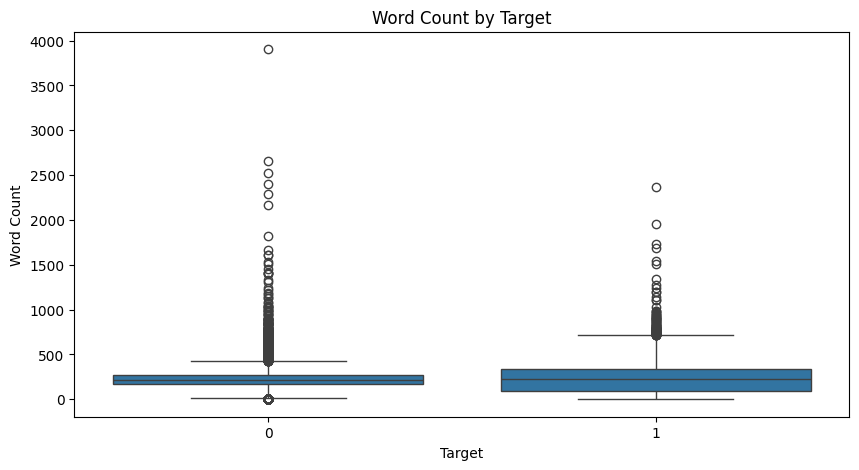

In [49]:
#Target vs word count
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Target', y='word_count')
plt.title('Word Count by Target')
plt.xlabel('Target')
plt.ylabel('Word Count')
plt.show()


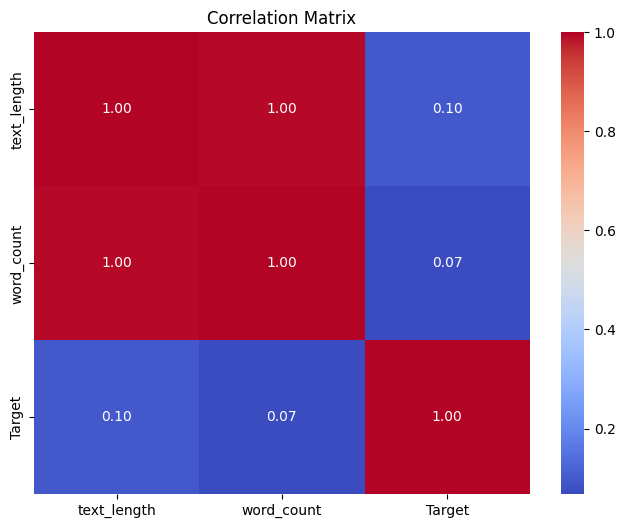

In [50]:
correlation_matrix = df[['text_length', 'word_count', 'Target']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#The correlation matrix shows that text_length and word_count are highly correlated (correlation = 1.00), while both have a weak positive correlation with the Target variable (0.10 and 0.07, respectively)

**Observations in Bivariant analysis** True news articles tend to have slightly longer text lengths and higher word counts, moreover, Articles under "politicsNews" are more likely to be true news. while fake news is more common in certain subject categories like "News." Both text length and word count show weak correlations with the Target variable.

In [51]:
df.head()

,title,text,subject,date,Target,stem_cleaned_text,lemma_cleaned_text1,text_length,word_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump wish american happi new year leav...,donald trump wish american happy new year leav...,1760,266
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,hous intellig committe chairman devin nune go ...,house intelligence committee chairman devin nu...,1315,184
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,friday reveal former milwauke sheriff david cl...,friday reveal former milwaukee sheriff david c...,2294,340
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,christma day donald trump announc would back w...,christmas day donald trump announce would back...,1742,263
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope franci use annual christma day messag reb...,pope francis use annual christmas day message ...,1388,212


In [52]:
#here i am doing splitting before vectorization because split data i want to use in LSTM i.e., X_train....etc  this TF_IDF or BOW trained data we can't use in LSTM 'embedding' will use there
X = df['lemma_cleaned_text1']
y = df['Target']
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

we can't use this TF_IDF or BOW trained data for advanced models like LSTM  'embedding(Glove / Bert/ Word2vec)' will use

In [43]:
# converting each categorical value to an integers using ordinal encoding
# #!pip install category_encoders
# import category_encoders as ce
# encoder = ce.OrdinalEncoder(cols=['subject'])
# X_train = encoder.fit_transform(X_train)
# X_test = encoder.transform(X_test)

# # data after encoding
# X_train.head()

,lemma_cleaned_text1,subject
6599,republican presidential hopeful texas senator ...,1
4193,reuters united nation security council issue w...,2
9999,reuters former u house speaker dennis hastert ...,2
10007,yea baby president trump walk walk president t...,3
4874,stephen colbert deliver scathing segment direc...,1


**Vectorization**

In [53]:
#Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Check the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", X_train_tfidf.shape)

TF-IDF Matrix Shape: (19880, 5000)


In [89]:
# to see vectorization
#1. View the Words (Features) Generated by TF-IDF
#Once you’ve fitted the TfidfVectorizer on the text data, you can check the vocabulary (i.e., the unique words used as features).
#The TfidfVectorizer stores this information in its vocabulary_ attribute, and the words are indexed according to their position in the resulting matrix.
# Get the feature names (i.e., the words in the vocabulary)

tfidf_feature_names = tfidf.get_feature_names_out()

# Print the first 20 feature names (words)
print("First 20 words in the vocabulary:")
print(tfidf_feature_names[:20])

First 20 words in the vocabulary:
['aaron' 'abandon' 'abbott' 'abc' 'abe' 'abedin' 'abide' 'ability' 'able'
 'aboard' 'abortion' 'abroad' 'abruptly' 'absence' 'absolute' 'absolutely'
 'absurd' 'abuse' 'aca' 'academic']


In [90]:
#2 The TF-IDF matrix is stored in the variable X, which is a sparse matrix. To view the matrix in a more readable format,
#you can convert it into a dense matrix.


# Convert the sparse TF-IDF matrix into a dense matrix (if you want to see actual values, be careful with large data)
dense_tfidf = X_train_tfidf.todense()

# Check the shape of the matrix
print(f"Shape of the TF-IDF matrix: {dense_tfidf.shape}")

# Convert the first row (representing the first document) to a list
first_doc_tfidf = dense_tfidf[0].tolist()[0]

# Pair the feature names (words) with their corresponding TF-IDF scores for the first document
tfidf_scores_first_doc = [(word, first_doc_tfidf[i]) for i, word in enumerate(tfidf_feature_names)]

# Sort the TF-IDF scores in descending order to see the most important words
tfidf_scores_first_doc_sorted = sorted(tfidf_scores_first_doc, key=lambda x: x[1], reverse=True)

# Print the top 10 TF-IDF scores for the first document
print("Top 10 words by TF-IDF score in the first document:")
for word, score in tfidf_scores_first_doc_sorted[:10]:
    print(f"{word}: {score:.4f}")


 #Explanation:
#todense(): Converts the sparse matrix into a dense matrix where each row represents a document and each column represents a word (with the value being the TF-IDF score).
#tfidf_feature_names: Contains the vocabulary (i.e., the list of words) that were learned by the TfidfVectorizer.
#first_doc_tfidf: This is the TF-IDF score vector for the first document in dataset. Each value represents the importance of the word (corresponding to the same index in the tfidf_feature_names array) in the document.

Shape of the TF-IDF matrix: (19880, 5000)
Top 10 words by TF-IDF score in the first document:
cruz: 0.6428
man: 0.2063
obamacare: 0.1820
affordable: 0.1523
care: 0.1484
insurance: 0.1446
repeal: 0.1382
disabled: 0.1253
lie: 0.1196
health: 0.1175


In [91]:
#3. View TF-IDF Scores for All Documents
# Check TF-IDF scores for the first 5 documents
for doc_num in range(5):
    doc_tfidf = dense_tfidf[doc_num].tolist()[0]
    tfidf_scores_doc = [(word, doc_tfidf[i]) for i, word in enumerate(tfidf_feature_names)]
    tfidf_scores_doc_sorted = sorted(tfidf_scores_doc, key=lambda x: x[1], reverse=True)

    print(f"\nTop 5 words by TF-IDF score in document {doc_num + 1}:")
    for word, score in tfidf_scores_doc_sorted[:5]:
        print(f"{word}: {score:.4f}")

#The words "microcephaly", "elect", and "reconsider" have the highest TF-IDF scores for the first document.etc.,
#This means they are important to that particular document compared to other words.


Top 5 words by TF-IDF score in document 1:
cruz: 0.6428
man: 0.2063
obamacare: 0.1820
affordable: 0.1523
care: 0.1484

Top 5 words by TF-IDF score in document 2:
north: 0.5238
korean: 0.3959
korea: 0.3477
sanction: 0.3175
ban: 0.2523

Top 5 words by TF-IDF score in document 3:
hastert: 0.6690
prosecutor: 0.2110
wrestling: 0.1868
sentence: 0.1771
abuse: 0.1702

Top 5 words by TF-IDF score in document 4:
harvey: 0.3897
texas: 0.3221
storm: 0.2727
visit: 0.1880
donate: 0.1722

Top 5 words by TF-IDF score in document 5:
colbert: 0.4644
cost: 0.3032
price: 0.2943
segment: 0.2895
breath: 0.1787


**Modelling**

In [63]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Build a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test_tfidf)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred_logreg)
# print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_logreg))

print("\nConfusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2738
           1       0.98      0.98      0.98      2233

    accuracy                           0.98      4971
   macro avg       0.98      0.98      0.98      4971
weighted avg       0.98      0.98      0.98      4971


Confusion Matrix - Logistic Regression:
[[2693   45]
 [  38 2195]]


In [64]:
from sklearn.naive_bayes import MultinomialNB

# Build a Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test_tfidf)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred_nb)
# print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_nb))


print("\nConfusion Matrix - Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))



              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2738
           1       0.92      0.93      0.92      2233

    accuracy                           0.93      4971
   macro avg       0.93      0.93      0.93      4971
weighted avg       0.93      0.93      0.93      4971


Confusion Matrix - Naive Bayes:
[[2553  185]
 [ 159 2074]]


In [65]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svc = model.predict(X_test_tfidf)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred_svc)
# print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_svc))

print("\nConfusion Matrix - SVC:")
print(confusion_matrix(y_test, y_pred_svc))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2738
           1       0.99      0.99      0.99      2233

    accuracy                           0.99      4971
   macro avg       0.99      0.99      0.99      4971
weighted avg       0.99      0.99      0.99      4971


Confusion Matrix - SVC:
[[2706   32]
 [  21 2212]]


In [74]:
# def output_lable(n):
#     if n == 0:
#         return "Fake News"
#     elif n == 1:
#         return "Not A Fake News"

# def manual_testing(news):
#     testing_news = {"text":[news]}
#     new_def_test = pd.DataFrame(testing_news)
#     new_def_test["text"] = new_def_test["text"].apply(wp1)
#     new_x_test = new_def_test["text"]
#     new_xv_test = tfidf.transform(new_x_test)
#     pred_LR = logreg.predict(new_xv_test)
#     pred_NB = nb.predict(new_xv_test)
#     pred_SVC = model.predict(new_xv_test)


#     return print("\n\nlogreg Prediction: {} \nnb Prediction: {} \nSVC Prediction: {}".format(output_lable(pred_LR[0]), output_lable(pred_NB[0]), output_lable(pred_SVC[0])))

In [77]:
# news = str(input())
# manual_testing(news)

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that s

# **LSTM**


In [78]:
# Parameters
max_words = 10000  # Vocabulary size
max_len = 100      # Maximum length of sequences

# Tokenization on the original text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)  # Use original text data here
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [79]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))  # Binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [80]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
# Fit the model
model_lstm.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_test_pad, y_test))



Epoch 1/5
622/622 ━━━━━━━━━━━━━━━━━━━━ 100s 152ms/step - accuracy: 0.9145 - loss: 0.2242 - val_accuracy: 0.9755 - val_loss: 0.0716
Epoch 2/5
622/622 ━━━━━━━━━━━━━━━━━━━━ 138s 146ms/step - accuracy: 0.9877 - loss: 0.0437 - val_accuracy: 0.9732 - val_loss: 0.0790
Epoch 3/5
622/622 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - accuracy: 0.9938 - loss: 0.0229 - val_accuracy: 0.9722 - val_loss: 0.0990
Epoch 4/5
622/622 ━━━━━━━━━━━━━━━━━━━━ 105s 169ms/step - accuracy: 0.9958 - loss: 0.0153 - val_accuracy: 0.9728 - val_loss: 0.1032
Epoch 5/5
622/622 ━━━━━━━━━━━━━━━━━━━━ 127s 145ms/step - accuracy: 0.9973 - loss: 0.0102 - val_accuracy: 0.9736 - val_loss: 0.1118


In [82]:
# Evaluate the LSTM model
loss, accuracy = model_lstm.evaluate(X_test_pad, y_test)
print(f"LSTM Model Accuracy: {accuracy * 100:.2f}%")

156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9729 - loss: 0.1108
LSTM Model Accuracy: 97.36%


## Manual Testing

In [85]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp1)  # Apply pre-processing (wp1)

    # Transform for traditional ML models (LogReg, NB, SVC)
    new_x_test = new_def_test["text"]
    new_xv_test = tfidf.transform(new_x_test)
    pred_LR = logreg.predict(new_xv_test)
    pred_NB = nb.predict(new_xv_test)
    pred_SVC = model.predict(new_xv_test)

    # Transform for LSTM model
    new_x_test_seq = tokenizer.texts_to_sequences(new_x_test)  # Tokenize the input
    new_x_test_pad = pad_sequences(new_x_test_seq, maxlen=max_len)  # Pad the sequence

    # LSTM prediction (output will be a probability, so round to get binary output)
    pred_LSTM = model_lstm.predict(new_x_test_pad)
    pred_LSTM_label = int(round(pred_LSTM[0][0]))  # Convert probability to binary label (0 or 1)

    # Print the predictions from all models
    return print("\n\nlogistic reg Prediction: {} \nnb Prediction: {} \nSVC Prediction: {} \nLSTM Prediction: {}".format(
        output_lable(pred_LR[0]),
        output_lable(pred_NB[0]),
        output_lable(pred_SVC[0]),
        output_lable(pred_LSTM_label)
    ))


In [86]:
news = str(input())
manual_testing(news)

On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the fol

# Deployment

In [ ]:
#steps -
#1) save our trained model using pickle or joblib file -- i.e., dump the file & load the model.
#2) create web app using Flask \ FastAPI \ streamlit \ Django -- that loads the model(pickle or joblib) and vectorizer, accepts incoming news articles, and returns predictions.
# eg:- consider flask app -- steps - create Flask app(initialize), load the model file(pickle or joblib) & vectorize file to read it,

In [ ]:
import pickle

# Save the model to a file
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

print("Model saved successfully as 'logistic_model.pkl'")

Model saved successfully as 'logistic_model.pkl'


In [ ]:
# Load the model from the pickle file
with open('logistic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Example prediction
y_pred1 = loaded_model.predict(X_test_tfidf)
print(y_pred1)


[1 1 0 ... 0 1 1]


In [ ]:
# from flask import Flask, request, jsonify
# import pickle

# # Load the saved model
# with open('logistic_model.pkl', 'rb') as file:
#     model = pickle.load(file)

# app = Flask(__name__)

# @app.route('/predict', methods=['POST'])
# def predict():
#     # Get data from POST request
#     data = request.json
#     # Assuming the input is a list of features
#     prediction = model.predict([data['features']])
#     return jsonify({'prediction': int(prediction[0])})

# if __name__ == '__main__':
#     app.run(debug=True)


**Conclusion**

This project focused on identifying true and fake news using natural language processing techniques. The text data was cleaned and prepared for analysis using extreme preprocessing techniques such tokenization, stop word removal, and lemmatization. Exploratory data analysis showed patterns like the frequency of political news and variations in text characteristics between true and fake news articles. During modelling stage, performed evaluation metrics such as accuracy, precision, recall, and F1-score. Based on the results, Support Vector Classifier (SVC) and Logistic Regression achieved the highest accuracies, with 99% and 98% respectively. These findings demonstrate that machine learning and deep learning models can effectively leverage such insights to enhance fake news detection systems.